## Importing libraries

In [35]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

In [36]:
# spotify libraries
import config
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score
from IPython.display import IFrame

#Initialize SpotiPy with user credentias
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))

In [37]:
# reading csv files
df_hot = pd.read_csv('df_hot.csv', index_col=0) # reading the hot songs 100 from Billboard & songs features
X = pd.read_csv('df_song_features.csv', index_col=0) # Courtesy Denny Meyer for the songs data file


# Let's see what we have.
#display(data)
# OMG! Another dictionary!!!

# We will not use the 'target' key as we don't want to classify the wines in types.
# we just want to cluster them.
X=X.dropna().reset_index(drop=True)
#X=X.drop(['index'], axis=1)

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11515 entries, 0 to 11514
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      11515 non-null  float64
 1   energy            11515 non-null  float64
 2   key               11515 non-null  float64
 3   loudness          11515 non-null  float64
 4   mode              11515 non-null  float64
 5   speechiness       11515 non-null  float64
 6   acousticness      11515 non-null  float64
 7   instrumentalness  11515 non-null  float64
 8   liveness          11515 non-null  float64
 9   valence           11515 non-null  float64
 10  tempo             11515 non-null  float64
 11  type              11515 non-null  object 
 12  id                11515 non-null  object 
 13  uri               11515 non-null  object 
 14  track_href        11515 non-null  object 
 15  analysis_url      11515 non-null  object 
 16  duration_ms       11515 non-null  float6

In [39]:
X.isnull().values.any()

False

In [40]:
check_nan_in_X = X.isnull().sum()
check_nan_in_X

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
track_name          0
artist_name         0
artist_id;          0
dtype: int64

## Scaling features

In [41]:
X_num=X._get_numeric_data()
X_num

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.491,0.698,1.0,-8.913,1.0,0.0503,0.6690,0.000012,0.4520,0.827,106.624,301857.0,4.0
1,0.500,0.472,9.0,-9.487,0.0,0.0309,0.7120,0.000569,0.2630,0.693,109.250,279518.0,4.0
2,0.517,0.621,5.0,-8.660,1.0,0.2230,0.7730,0.000000,0.1460,0.782,111.710,364712.0,4.0
3,0.409,0.352,3.0,-11.444,1.0,0.0310,0.7090,0.000000,0.2650,0.516,138.004,93519.0,3.0
4,0.641,0.654,10.0,-10.219,1.0,0.1220,0.6530,0.000000,0.0733,0.736,100.351,300053.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11510,0.502,0.825,1.0,-7.609,1.0,0.0367,0.0121,0.689000,0.1200,0.198,177.996,184505.0,4.0
11511,0.586,0.419,4.0,-10.375,0.0,0.0503,0.2960,0.379000,0.0911,0.216,123.030,219771.0,4.0
11512,0.581,0.451,1.0,-8.857,1.0,0.0457,0.3680,0.896000,0.2410,0.325,147.026,185722.0,4.0
11513,0.654,0.631,0.0,-7.780,1.0,0.1410,0.2320,0.103000,0.0487,0.364,161.977,197646.0,4.0


In [42]:
X.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,11515.000000,11515.000000,11515.000000,11515.000000,11515.000000,11515.000000,11515.000000,11515.000000,11515.000000,11515.000000,11515.000000,1.151500e+04,11515.000000
mean,0.573817,0.638101,5.178984,-8.333538,0.585845,0.087066,0.257691,0.201535,0.210086,0.440161,122.838646,2.411051e+05,3.924620
std,0.169228,0.234471,3.586206,4.372669,0.492597,0.111822,0.310151,0.330950,0.196890,0.255613,29.511787,1.332284e+05,0.392806
min,0.000000,0.000000,0.000000,-38.829000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.293000e+03,0.000000
25%,0.462000,0.484000,2.000000,-10.029500,0.000000,0.035700,0.012900,0.000002,0.096600,0.222000,100.018000,1.854535e+05,4.000000
50%,0.587000,0.678000,5.000000,-7.386000,1.000000,0.047300,0.103000,0.001270,0.126000,0.417000,122.021000,2.262530e+05,4.000000
75%,0.699000,0.827000,8.000000,-5.427000,1.000000,0.079600,0.432000,0.299000,0.254000,0.641000,140.022000,2.755190e+05,4.000000
max,0.987000,0.999000,11.000000,-0.020000,1.000000,0.961000,0.996000,0.992000,0.997000,0.987000,219.297000,4.962076e+06,5.000000


In [43]:
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled_df = pd.DataFrame(X_scaled, columns = X_num.columns)
display(X_num.head())
print()
display(X_scaled_df.head())

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.491,0.698,1.0,-8.913,1.0,0.0503,0.669,0.000012,0.4520,0.827,106.624,301857.0,4.0
1,0.500,0.472,9.0,-9.487,0.0,0.0309,0.712,0.000569,0.2630,0.693,109.250,279518.0,4.0
2,0.517,0.621,5.0,-8.660,1.0,0.2230,0.773,0.000000,0.1460,0.782,111.710,364712.0,4.0
3,0.409,0.352,3.0,-11.444,1.0,0.0310,0.709,0.000000,0.2650,0.516,138.004,93519.0,3.0
4,0.641,0.654,10.0,-10.219,1.0,0.1220,0.653,0.000000,0.0733,0.736,100.351,300053.0,4.0


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-0.489401,0.255476,-1.165344,-0.132525,0.840796,-0.328801,1.326215,-0.608948,1.228727,1.513444,-0.549453,0.456018,0.191910
1,-0.436216,-0.708436,1.065522,-0.263800,-1.189350,-0.502299,1.464863,-0.607266,0.268759,0.989191,-0.460468,0.288336,0.191910
2,-0.335756,-0.072936,-0.049911,-0.074663,0.840796,1.215686,1.661550,-0.608985,-0.325506,1.337389,-0.377108,0.927822,0.191910
3,-0.973976,-1.220248,-0.607628,-0.711373,0.840796,-0.501405,1.455190,-0.608985,0.278918,0.296708,0.513897,-1.107816,-2.353987
4,0.397016,0.067812,1.344380,-0.431211,0.840796,0.312425,1.274625,-0.608985,-0.694764,1.157422,-0.762022,0.442476,0.191910


In [44]:
scaler.mean_

array([ 5.73816769e-01,  6.38100706e-01,  5.17898393e+00, -8.33353834e+00,
        5.85844551e-01,  8.70655667e-02,  2.57690946e-01,  2.01534639e-01,
        2.10086218e-01,  4.40160903e-01,  1.22838646e+02,  2.41105149e+05,
        3.92462006e+00])

In [45]:
X_scaled_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.151500e+04,1.151500e+04,1.151500e+04,1.151500e+04,1.151500e+04,1.151500e+04,1.151500e+04,1.151500e+04,1.151500e+04,1.151500e+04,1.151500e+04,1.151500e+04,1.151500e+04
mean,4.637097e-16,-3.935676e-17,-4.851236e-16,4.458970e-17,1.281746e-16,1.526111e-16,1.831603e-16,1.435914e-15,-1.236672e-16,3.037470e-16,1.663744e-16,-2.442201e-16,6.514401e-16
std,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00,1.000043e+00
min,-3.390938e+00,-2.721563e+00,-1.444203e+00,-6.974410e+00,-1.189350e+00,-7.786431e-01,-8.308924e-01,-6.089850e-01,-1.067069e+00,-1.722057e+00,-4.162540e+00,-1.777568e+00,-9.991677e+00
25%,-6.607750e-01,-6.572548e-01,-8.864861e-01,-3.878719e-01,-1.189350e+00,-4.593716e-01,-7.892980e-01,-6.089780e-01,-5.764185e-01,-8.535185e-01,-7.733058e-01,-4.177344e-01,1.919095e-01
50%,7.790557e-02,1.701744e-01,-4.991116e-02,2.167051e-01,8.407957e-01,-3.556307e-01,-4.987817e-01,-6.051474e-01,-4.270902e-01,-9.061321e-02,-2.770693e-02,-1.114837e-01,1.919095e-01
75%,7.397633e-01,8.056742e-01,7.866638e-01,6.647347e-01,8.407957e-01,-6.676591e-02,5.620379e-01,2.945148e-01,2.230466e-01,7.857498e-01,5.822792e-01,2.583185e-01,1.919095e-01
max,2.441683e+00,1.539271e+00,1.623239e+00,1.901333e+00,8.407957e-01,7.815754e+00,2.380586e+00,2.388580e+00,3.996887e+00,2.139418e+00,3.268611e+00,3.543672e+01,2.737806e+00


## Clustering with K-Means

In [46]:
kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(X_scaled_df)

KMeans(random_state=1234)

In [47]:
len(kmeans.labels_)

11515

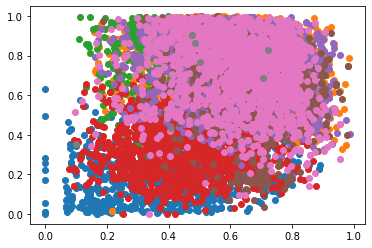

In [48]:
# assign a cluster to each example
labels = kmeans.predict(X_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(X.to_numpy()[row_ix, 0], X.to_numpy()[row_ix, 1])
    # show the plot
pyplot.show()

In [49]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0     700
1    3408
2     807
3    1765
4    2527
5     635
6    1665
7       8
dtype: int64

In [50]:
#X_df = pd.DataFrame(X)
X["cluster"] = clusters
X.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,track_name,artist_name,artist_id;,cluster
0,0.491,0.698,1.0,-8.913,1.0,0.0503,0.669,0.000012,0.4520,0.827,...,2OGawqjrXSuT9REyNfDo6w,spotify:track:2OGawqjrXSuT9REyNfDo6w,https://api.spotify.com/v1/tracks/2OGawqjrXSuT...,https://api.spotify.com/v1/audio-analysis/2OGa...,301857.0,4.0,Aaj Ka Ye Din,Kalyanji-Anandji,7pWXlTjky0KXWgbdZi9ebq;,1
1,0.500,0.472,9.0,-9.487,0.0,0.0309,0.712,0.000569,0.2630,0.693,...,5DdZw9x5dLgpzXjj6GHxIn,spotify:track:5DdZw9x5dLgpzXjj6GHxIn,https://api.spotify.com/v1/tracks/5DdZw9x5dLgp...,https://api.spotify.com/v1/audio-analysis/5DdZ...,279518.0,4.0,Main Hoon Tere Samne,Kalyanji-Anandji,7pWXlTjky0KXWgbdZi9ebq;,3
2,0.517,0.621,5.0,-8.660,1.0,0.2230,0.773,0.000000,0.1460,0.782,...,3Ho6oTWwISyvTI2y0TqrjP,spotify:track:3Ho6oTWwISyvTI2y0TqrjP,https://api.spotify.com/v1/tracks/3Ho6oTWwISyv...,https://api.spotify.com/v1/audio-analysis/3Ho6...,364712.0,4.0,Dulha Dulhan Ki Jodi,Kalyanji-Anandji,7pWXlTjky0KXWgbdZi9ebq;,3
3,0.409,0.352,3.0,-11.444,1.0,0.0310,0.709,0.000000,0.2650,0.516,...,0eOfVox5SIKMmSAi9ayd7J,spotify:track:0eOfVox5SIKMmSAi9ayd7J,https://api.spotify.com/v1/tracks/0eOfVox5SIKM...,https://api.spotify.com/v1/audio-analysis/0eOf...,93519.0,3.0,Ankh Zhapak Te Khel Gaye,Kalyanji-Anandji,7pWXlTjky0KXWgbdZi9ebq;,3
4,0.641,0.654,10.0,-10.219,1.0,0.1220,0.653,0.000000,0.0733,0.736,...,0XhArL19uo3LVvpWWCY9Zu,spotify:track:0XhArL19uo3LVvpWWCY9Zu,https://api.spotify.com/v1/tracks/0XhArL19uo3L...,https://api.spotify.com/v1/audio-analysis/0XhA...,300053.0,4.0,Pyare Tere Pyar Mein,Kalyanji-Anandji,7pWXlTjky0KXWgbdZi9ebq;,1


In [51]:
X[X['cluster'] == 4].sample()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,track_name,artist_name,artist_id;,cluster
9900,0.861,0.794,5.0,-5.834,0.0,0.0774,0.012,0.00257,0.0922,0.535,...,0BSfGprlDgnDhq9BBrdtoK,spotify:track:0BSfGprlDgnDhq9BBrdtoK,https://api.spotify.com/v1/tracks/0BSfGprlDgnD...,https://api.spotify.com/v1/audio-analysis/0BSf...,380720.0,4.0,Piece Of Me - Extended Mix,Becky Hill,4EPJlUEBy49EX1wuFOvtjK;,4


In [52]:
kmeans.inertia_

87509.25765643558

In [53]:
kmeans2 = KMeans(n_clusters=50,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=10,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(X_scaled_df)
print(kmeans2.inertia_)

49360.465084542244


## Chosing K

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

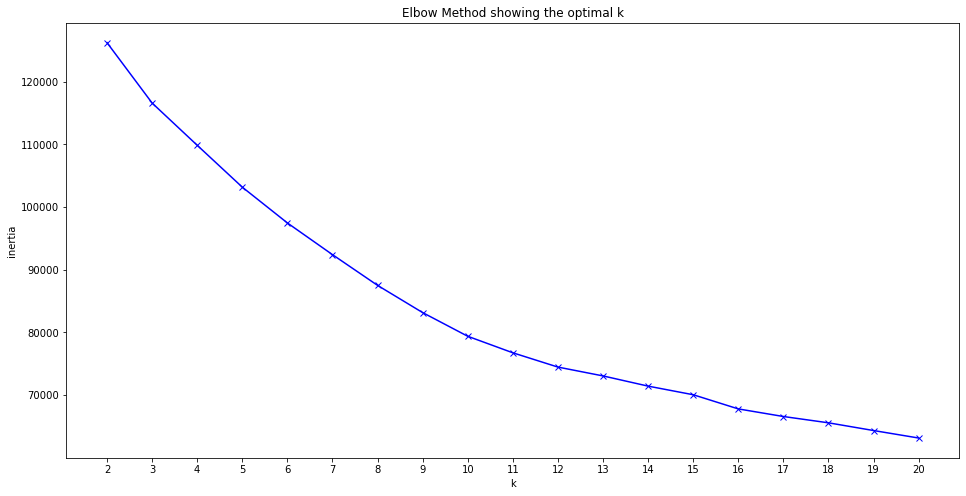

In [54]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [55]:
#K = range(2, 20)
#silhouette = []

#for k in K:
   # kmeans = KMeans(n_clusters=k,
                    #random_state=1234)
    #kmeans.fit(X_scaled_df)
    #filename = "Model/kmeans_" + str(k) + ".pickle"
    #with open(filename, "wb") as f:
       # pickle.dump(kmeans,f)
    #silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


#plt.figure(figsize=(16,8))
#plt.plot(K, silhouette, 'bx-')
##plt.xlabel('k')
#plt.ylabel('silhouette score')
##plt.xticks(np.arange(min(K), max(K)+1, 1.0))
#plt.title('Silhouette Method showing the optimal k')

In [22]:
## conda install -c districtdatalabs yellowbrick

In [56]:
#from yellowbrick.cluster import SilhouetteVisualizer
#model = KMeans(4, random_state=42)
#visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
#visualizer.fit(X_scaled_df)        # Fit the data to the visualizer
#visualizer.show()        # Finalize and render the figure

# Saving with pickle

In [57]:
import pickle

#scaler = StandardScaler()
#model = KMeans()

with open("scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)

with open("kmeans_4.pickle", "wb") as f:
    pickle.dump(kmeans,f)

In [58]:
scaler.mean_

array([ 5.73816769e-01,  6.38100706e-01,  5.17898393e+00, -8.33353834e+00,
        5.85844551e-01,  8.70655667e-02,  2.57690946e-01,  2.01534639e-01,
        2.10086218e-01,  4.40160903e-01,  1.22838646e+02,  2.41105149e+05,
        3.92462006e+00])

In [59]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
    except FileNotFoundError: 
        print("File not found!") 

In [60]:
# user input a song
## get the audio features for the song from spotify 
## scale the audio features with scaler that you build the Kmean on 
## predict for the user song(audio features) in which cluster belong to (e.g belongs to 7 )
## got the 100,000000 database and recommed a song that belong to the same cluster of the user input song 

In [61]:
#a= "man in the mirror"

#"black or white"#"they don't really care about us"#"billie jean" # they don't really care about us
#b= ''

In [69]:
matches = 'Good choice!. Are you in for another "Top Hit" of this week?' # msg 1 when the title entered is available in our lists
confirm = 'Please enter "y" or "n": ' # msg 2 requesting yes or no input request from user for Top hits recommendations
reconfirm = 'If you are interested in "Top Hits" please enter "y" or "n": ' # msg 3 reconfirmation of Top hits recommendations
recommendation_msg = 'Our recommendation for you: Song -' #msg 4 message showing the recommendation of the title
invalid_input = 'Sorry, not a valid input.' # msg 5 for invalid entry
thanks = 'Thanks for visiting our collections. Enjoy your music.' #msg 6 thanks for using the song collection facility
limit = 'Sorry, you have exceeded the allowed number of input attempts. Please try again later.' # msg 7, invalid entry more than 2 times
sorry = 'Sorry, We do not have that Genre. Enjoy your music.' #msg 8 when the entered title does not match with our collection 
recommendation = np.random.choice(df_hot.album)
song_feature_recommendation = ". Great choice!!!\nWe recommend a similar genre for you. Here you go..Song-"



def hotsong_or_your_kind():   
    user_input = input("Please enter the song of your choice: ")
    #defining the valid input lists
    valid_input2 =['yes','y','n','no']
    no = ['n','no']
    yes = ['yes','y']
    hotsong_or_your_kind.song_input= user_input
    
     # fetching the artists name:
    for al, ar in zip(df_hot.album, df_hot.artist):
        if al.lower()== user_input.lower():
            y = ar
            #input(f'\n"{user_input.title()}" from "{y}". {matches}\n{confirm}')

            
    if user_input.lower() in str(df_hot.album).lower(): # Happy path with matching title,confirmation yes, print recommendation
        user_input1 = input(f'\n"{user_input.title()}" from "{y}". \n{matches}\n\n{confirm}')
        if user_input1.lower() in str(yes).lower():
            #recommendation = np.random.choice(df_hot.album)
            print(f'\n{recommendation_msg}"{recommendation}". Enjoy!!!!')
        elif user_input1.lower() in str(no).lower(): # Happy path with matching title,confirmation no, print thanks for visiting
            print(f'\n{thanks}')
        #count +=1
        elif user_input1.lower() not in str(valid_input2).lower(): # matching title,valid confirmation input on 2nd attempt, 
            user_input2 = input(f'\n{invalid_input} {reconfirm}')
            if user_input2.lower() in str(yes).lower():
                print(f'\n{recommendation_msg}"{recommendation}". Enjoy!!!!') #on an input of yes, print recommendation
            elif user_input2.lower() in str(no).lower():
                print(f'\n{thanks}') #on an input of no, print recommendation
            elif user_input2.lower() not in str(valid_input2).lower():# matching title,invalid input on 2nd attempt, number of attempts limit exceeded msg   
                print(f'\n{limit}')
    elif user_input.lower() not in str(df_hot.album).lower(): # Happy path with no matching title,print sorry
        song = sp.search(q= user_input.title(), type = "track", limit=1, market= 'GB') # to restrict to a song name and artist.
        song_features= sp.audio_features(song["tracks"]["items"][0]["uri"])[0]
        scaler = load("scaler.pickle")
        song_features_df = pd.DataFrame(song_features, index=[0])
        song_features_df_num=song_features_df._get_numeric_data()
        song_scaled = scaler.transform(song_features_df_num)
        kmeans = load("kmeans_4.pickle")
        pred= kmeans.predict(song_scaled)
        song_rec_df= X.where(X["cluster"]== pred.item(0)).dropna()
        rec_song = np.random.choice(song_rec_df.track_name)
        hotsong_or_your_kind.rec_song = rec_song
        for track, artist in zip(song_rec_df.track_name, song_rec_df.artist_name):
            if track.lower()== rec_song.lower():
                y = artist
        print(f'"{user_input.title()}"{song_feature_recommendation}"{rec_song}" from "{y}" (artist).')
        from IPython.display import IFrame

        track_id = sp.audio_features(song["tracks"]["items"][0]["uri"])[0]['id']
        track_id1 = sp.audio_features(rec_song["tracks"]["items"][0]["uri"])[0]['id']
#sp.audio_features(song["tracks"]["items"][0]["uri"])[0]['id']
        print("Song of the users' choice: ")
        display(IFrame(src=f"https://open.spotify.com/embed/track/{track_id}",
           width="320",
           height="80",
           frameborder="0",
           allowtransparency="true",
           allow="encrypted-media",))
#sp.audio_features(song["tracks"]["items"][0]["uri"])[0]['id']

        display(IFrame(src=f"https://open.spotify.com/embed/track/{track_id1}",
           width="320",
           height="80",
           frameborder="0",
           allowtransparency="true",
           allow="encrypted-media",))

In [70]:
hotsong_or_your_kind()

Please enter the song of your choice: beat it
"Beat It". Great choice!!!
We recommend a similar genre for you. Here you go..Song-"Tainted Love" from "Dexys Midnight Runners" (artist).


C:\Users\Josephine\anaconda3\envs\DA_envt\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


TypeError: string indices must be integers

In [ ]:
song = sp.search(q= hotsong_or_your_kind.song_input.title(), type = "track", limit=1, market= 'GB')
rec_song = sp.search(q= hotsong_or_your_kind.rec_song.title(), type = "track", limit=1, market= 'GB')

# to restrict to a song name and artist.
# user input song
from IPython.display import IFrame

track_id = sp.audio_features(song["tracks"]["items"][0]["uri"])[0]['id']
#sp.audio_features(song["tracks"]["items"][0]["uri"])[0]['id']
print("Song of the users' choice: ")
display(IFrame(src=f"https://open.spotify.com/embed/track/{track_id}",
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      ))

track_id2 = sp.audio_features(rec_song["tracks"]["items"][0]["uri"])[0]['id']
#sp.audio_features(song["tracks"]["items"][0]["uri"])[0]['id']

display(IFrame(src=f"https://open.spotify.com/embed/track/{track_id2}",
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      ))

In [ ]:
hotsong_or_your_kind.song_input

In [ ]:
#song = sp.search(q= hotsong_or_your_kind.song_input.title(), type = "track", limit=1, market= 'GB')

In [ ]:
sp.audio_features(song["tracks"]["items"][0]["uri"])[0]

In [ ]:
#sp.audio_features(song["tracks"]["items"][0]["uri"])[0]['id']

In [ ]:
user_input = input("Please enter the song of your choice: ")
song_feature_recommendation = "from artists. Great choice!!!\nWe recommend a similar genre for you. Here you go..Song-"
if user_input.lower() not in str(df_hot.album).lower(): # Happy path with no matching title,print sorry
    song = sp.search(q= user_input.title(), type = "track", limit=1, market= 'GB') # to restrict to a song name and artist.
    song_features= sp.audio_features(song["tracks"]["items"][0]["uri"])[0]
    scaler = load("scaler.pickle")
    song_features_df = pd.DataFrame(song_features, index=[0])
    song_features_df_num=song_features_df._get_numeric_data()
    song_scaled = scaler.transform(song_features_df_num)
    kmeans = load("kmeans_4.pickle")
    pred= kmeans.predict(song_scaled)
    song_rec_df= X.where(X["cluster"]== pred.item(0)).dropna()
    rec_song = np.random.choice(song_rec_df.track_name)
    for track, artist in zip(song_rec_df.track_name, song_rec_df.artist_name):
        if track.lower()== rec_song.lower():
            y = artist
print(f'"{user_input.title()}"{song_feature_recommendation}"{rec_song}" from "{y}" (artist).')

In [ ]:
print(song_features_df_num)

In [ ]:
song_rec_df.describe()

In [ ]:
#song = sp.search(q="track: beat it artists: Michael Jackson",limit=1,market= 'GB')
#song

In [ ]:
song_features_df = pd.DataFrame(song_features, index=[0])
song_features_df.info()

In [ ]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
    except FileNotFoundError: 
        print("File not found!") 


In [ ]:
scaler = load("scaler.pickle")
scaler

In [ ]:
song_features_df_num=song_features_df._get_numeric_data()
song_scaled = scaler.transform(song_features_df_num)

In [ ]:
kmeans = load("kmeans_4.pickle")
kmeans

In [ ]:
pred= kmeans.predict(song_scaled)
pred.item(0)

In [ ]:
song_rec_df= X.where(X["cluster"]== pred.item(0)).dropna()
song_rec_df

In [ ]:
rec_song = np.random.choice(song_rec_df.track_name)
for track, artist in zip(song_rec_df.track_name, song_rec_df.artist_name):
        if track.lower()== rec_song.lower():
            y = artist
            print(f'We recommend a similar genre for you. Here you go..Song-"{rec_song}" from "{y}" (artist).')

In [ ]:
song = sp.search(q= a, type = "track", limit=1, market= 'GB') # to restrict to a song name and artist.

song_features= sp.audio_features(song["tracks"]["items"][0]["uri"])[0]
song["tracks"]["items"][0]["uri"])[0]

def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
    except FileNotFoundError: 
        print("File not found!") 

scaler = load("scaler.pickle")
song_features_df_num=song_features_df._get_numeric_data()
song_scaled = scaler.transform(song_features_df_num)
kmeans = load("kmeans_4.pickle")
pred= kmeans.predict(song_scaled)
song_rec_df= X.where(X["cluster"]== pred.item(0)).dropna()
rec_song = np.random.choice(song_rec_df.track_name)
for track, artist in zip(song_rec_df.track_name, song_rec_df.artist_name):
        if track.lower()== rec_song.lower():
            y = artist
            print(f'We recommend a similar genre for you. Here you go..Song-"{rec_song}" from "{y}" (artist).')
            
